# Scikit-learn Introduction

## Get the data

In [30]:
import pandas as pd
import numpy as np

In [31]:
# Get the UCLA Admissions dataset
ucla_admit_df = pd.read_csv("ucla_admit.csv")

In [32]:
ucla_admit_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,1,337,118,4,4.5,4.5,3.89,1,Yes
1,2,324,107,4,4.0,4.5,3.58,1,Yes
2,3,316,104,3,3.0,3.5,3.23,1,No
3,4,322,110,3,3.5,2.5,3.50,1,Yes
4,5,314,103,2,2.0,3.0,3.31,0,No


### Drop unwanted features

In [33]:
# Drop unwanted features
ucla_admit_df = ucla_admit_df.drop("Serial No.", axis=1)

# Descriptive Statistics

In [34]:
ucla_admit_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,3.467325,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.240524,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,2.740000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,3.290000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,3.475000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,3.652500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,4.000000,1.000000


# Evaluate Features

### Check Correlated Features

In [35]:
ucla_admit_df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.832669,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828019,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.745734,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718403,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.669626,0.396859
GPA,0.832669,0.828019,0.745734,0.718403,0.669626,1.000000,0.521163
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521163,1.000000


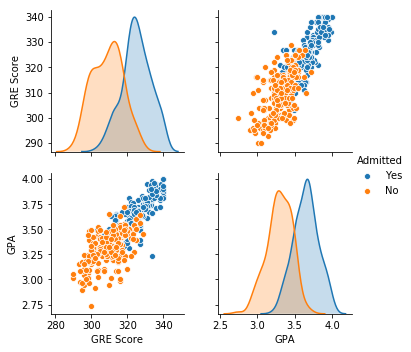

In [37]:
import seaborn as sns

# hides Jupyter warnings
import warnings
warnings.filterwarnings('ignore')

pair_plot = sns.pairplot(ucla_admit_df[["Admitted", "GRE Score", "GPA"]], hue='Admitted')

### Feature Engineering and Transformation

In [38]:
# Most algorithms require strings to be converted to numbers (you can use .map() to accomplish this).
# Transform "Admitted" from strings to a binary feature
ucla_admit_df["Admitted"] = ucla_admit_df["Admitted"].map({"No":0, "Yes": 1})

In [7]:
# combine "GRE Score" and "GPA" into a new feature, "Performance Score"

ucla_admit_df["Performance Score"] = ucla_admit_df["GRE Score"]+(ucla_admit_df["GPA"]*100)

ucla_admit_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted,Performance Score
0,337,118,4,4.5,4.5,3.89,1,1,726.0
1,324,107,4,4.0,4.5,3.58,1,1,682.0
2,316,104,3,3.0,3.5,3.23,1,0,639.0
3,322,110,3,3.5,2.5,3.50,1,1,672.0
4,314,103,2,2.0,3.0,3.31,0,0,645.0


In [8]:
# You can create an adjusted performance score, "Adj. GPA" 
#         to account for the level of University they're applying to.
ucla_admit_df["Adj. GPA"] = (ucla_admit_df["GPA"]*100) +(ucla_admit_df["University Rating"]*10)

ucla_admit_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted,Performance Score,Adj. GPA
0,337,118,4,4.5,4.5,3.89,1,1,726.0,429.0
1,324,107,4,4.0,4.5,3.58,1,1,682.0,398.0
2,316,104,3,3.0,3.5,3.23,1,0,639.0,353.0
3,322,110,3,3.5,2.5,3.50,1,1,672.0,380.0
4,314,103,2,2.0,3.0,3.31,0,0,645.0,351.0


# Inferential Statistics

In [9]:
from scipy import stats
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [10]:
# You can apply inferential statistics
# For example, you can use a t-test to see if the difference in mean GRE scores 
#              between the admitted and not admitted groups is real or by random chance.

# get the GRE Scores of each group
adm_mean_GRE = ucla_admit_df.loc[ucla_admit_df["Admitted"] == 1, "GRE Score"]
not_mean_GRE = ucla_admit_df.loc[ucla_admit_df["Admitted"] == 0, "GRE Score"]

In [12]:
adm_mean_GRE.mean(), not_mean_GRE.mean()

(325.18324607329845, 309.1531100478469)

In [11]:
# perform the t-test for differences between means
stats.ttest_ind(adm_mean_GRE, not_mean_GRE)

Ttest_indResult(statistic=19.48544442909625, pvalue=7.300443662324425e-60)

# Machine Learning

In [39]:
# You could potentially drop "GRE Score" and "GPA" as they are favtored into "Performance Score"

ucla_admit_df = ucla_admit_df.drop(["GRE Score", "GPA"], axis=1)
ucla_admit_df.head()

,TOEFL Score,University Rating,SOP,LOR,Research,Admitted
0,118,4,4.5,4.5,1,1
1,107,4,4.0,4.5,1,1
2,104,3,3.0,3.5,1,0
3,110,3,3.5,2.5,1,1
4,103,2,2.0,3.0,0,0


In [14]:
# Move the Target variable "Admitted" to be the last variable
ucla_admit_df = ucla_admit_df.iloc[:, [0,1,2,3,4,6,7, 5]]
ucla_admit_df.head()

,TOEFL Score,University Rating,SOP,LOR,Research,Performance Score,Adj. GPA,Admitted
0,118,4,4.5,4.5,1,726.0,429.0,1
1,107,4,4.0,4.5,1,682.0,398.0,1
2,104,3,3.0,3.5,1,639.0,353.0,0
3,110,3,3.5,2.5,1,672.0,380.0,1
4,103,2,2.0,3.0,0,645.0,351.0,0


## Separate the data into X (features) and y (target)

In [40]:
# return only the values, not the DataFrame
   # capital X usually indicates all of the features that the algorithm will be given to learn from
    
X = ucla_admit_df.iloc[:,:-1].values

In [16]:
X[:5]

array([[118. ,   4. ,   4.5,   4.5,   1. , 726. , 429. ],
       [107. ,   4. ,   4. ,   4.5,   1. , 682. , 398. ],
       [104. ,   3. ,   3. ,   3.5,   1. , 639. , 353. ],
       [110. ,   3. ,   3.5,   2.5,   1. , 672. , 380. ],
       [103. ,   2. ,   2. ,   3. ,   0. , 645. , 351. ]])

In [17]:
# lowercase y usually indicates the classifications that you would like to predict.
    # Most algorithms require strings to be converted to numbers (you can use .map() to accomplish this).
    
y = ucla_admit_df.iloc[:,-1].values

In [18]:
y

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

## Split the data into train and test sets

In [19]:
# split dataset into test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [20]:
X_train.shape, X_test.shape

((280, 7), (120, 7))

In [21]:
# standardize features using scikit-learn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [22]:
X_train[:5]

array([[108. ,   2. ,   4. ,   3.5,   0. , 617. , 330. ],
       [102. ,   3. ,   2. ,   3. ,   0. , 646. , 363. ],
       [100. ,   3. ,   3. ,   3.5,   0. , 633. , 363. ],
       [110. ,   3. ,   3.5,   4. ,   0. , 661. , 375. ],
       [110. ,   4. ,   3.5,   4. ,   1. , 675. , 390. ]])

In [23]:
X_train_std[:5]

array([[ 0.08218457, -0.92883263,  0.60139291,  0.05212093, -1.07417231,
        -1.38844439, -1.42700216],
       [-0.89013991, -0.06192218, -1.41525397, -0.48839242, -1.07417231,
        -0.53382277, -0.44139146],
       [-1.21424806, -0.06192218, -0.40693053,  0.05212093, -1.07417231,
        -0.91692901, -0.44139146],
       [ 0.40629273, -0.06192218,  0.09723119,  0.59263428, -1.07417231,
        -0.0917771 , -0.08298757],
       [ 0.40629273,  0.80498828,  0.09723119,  0.59263428,  0.93094934,
         0.32079886,  0.3650173 ]])

## Create and evaluate some models

# CLASSIFICATION ALGORITHMS

### Logistic Regression

In [24]:
# binary classifier
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.predict(X_test_std)

C:\Users\r560847\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [25]:
log_reg.score(X_test_std, y_test)

0.9

In [26]:
log_reg.predict_proba(X_test_std)

array([[6.09905382e-01, 3.90094618e-01],
       [8.26043298e-01, 1.73956702e-01],
       [1.09731183e-01, 8.90268817e-01],
       [1.47385307e-01, 8.52614693e-01],
       [3.01330359e-02, 9.69866964e-01],
       [9.32091371e-01, 6.79086288e-02],
       [9.31548385e-01, 6.84516149e-02],
       [9.96697291e-01, 3.30270897e-03],
       [9.99213886e-01, 7.86113627e-04],
       [1.92404001e-03, 9.98075960e-01],
       [6.49629841e-02, 9.35037016e-01],
       [2.41837745e-03, 9.97581623e-01],
       [7.49603982e-03, 9.92503960e-01],
       [9.11674545e-01, 8.83254547e-02],
       [4.31178488e-01, 5.68821512e-01],
       [8.11142137e-01, 1.88857863e-01],
       [7.47297390e-02, 9.25270261e-01],
       [9.50785787e-03, 9.90492142e-01],
       [9.96922928e-01, 3.07707186e-03],
       [8.50369795e-01, 1.49630205e-01],
       [9.27660440e-01, 7.23395602e-02],
       [1.87295131e-01, 8.12704869e-01],
       [3.10006308e-02, 9.68999369e-01],
       [4.27719221e-03, 9.95722808e-01],
       [8.030845

### Support Vector Machine

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, y_train)
svm.score(X_test_std, y_test)

0.9

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
tree.score(X_test_std, y_test)

0.8166666666666667

### K-nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.8666666666666667